In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 44.9 MB/s eta 0:00:00


# Importar datos

In [10]:
import zipfile
import os
import mne
import shutil

In [11]:
cnt_file = '/content/drive/MyDrive/SEED/EEG_raw/1_1_20180804.cnt'

raw_data = mne.io.read_raw_cnt(cnt_file, preload=True)

Reading 0 ... 3378359  =      0.000 ...  3378.359 secs...


Using matplotlib as 2D backend.


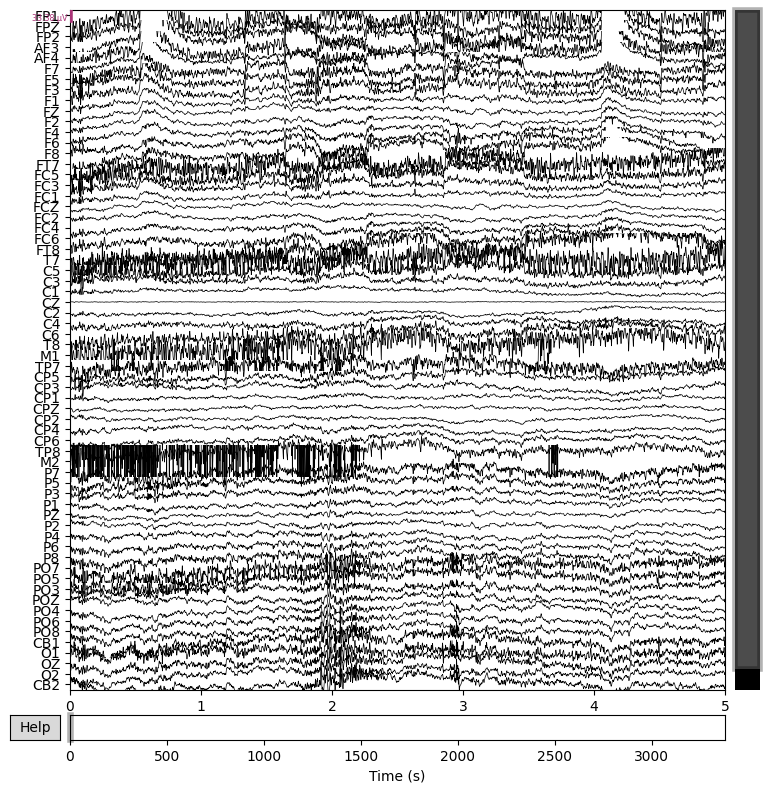

In [12]:
raw_data.plot(duration=5, n_channels=64, scalings='auto', title='Señales EEG', show=True, block=True);

In [13]:
canales_a_eliminar = ['M1', 'M2', 'VEO', 'HEO']

raw_data.drop_channels(canales_a_eliminar)

print("Canales restantes:")
print(raw_data.ch_names)

Canales restantes:
['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']


# Referenciar mediante la media

In [14]:
raw_data.set_eeg_reference(ref_channels='average')

raw_data.apply_proj()

print("Referencia de los datos después de la re-referenciación:", raw_data.info['custom_ref_applied'])

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
Referencia de los datos después de la re-referenciación: 1 (FIFFV_MNE_CUSTOM_REF_ON)


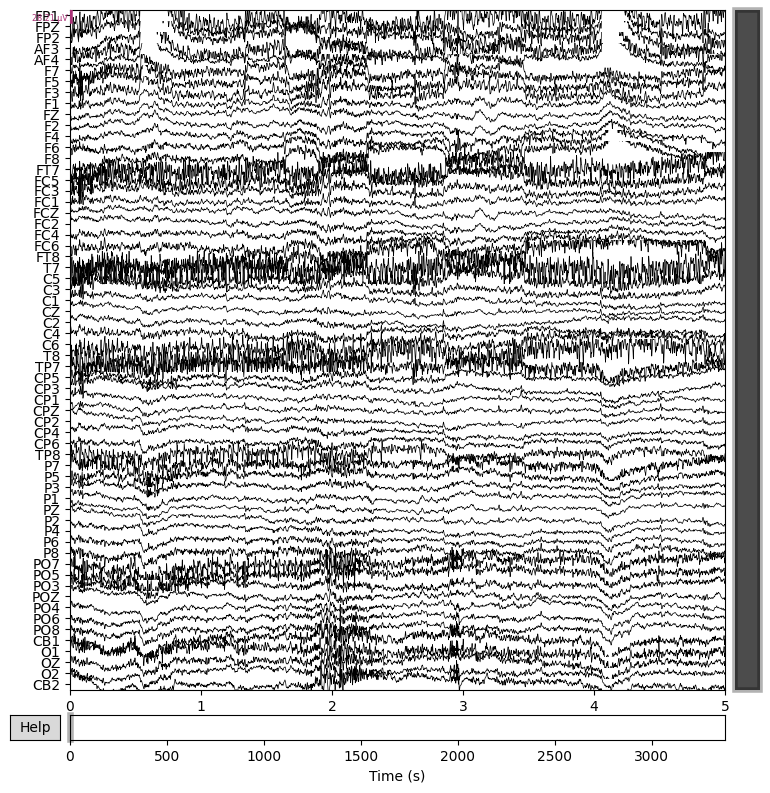

In [15]:
raw_data.plot(duration=5, n_channels=62, scalings='auto', title='Señales EEG', show=True, block=True);